<H1>Stationarity Vs. Non-Stationarity
Analysis </H1>

<H3> Objective of this lab is to understand how do we decide about statonarity and non-stationarity time series data

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np

#Daily Female Birth

<H2>Read a dataset which is Stationarity
(daily-total-female-births.csv) </H2>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving daily-total-female-births.csv to daily-total-female-births.csv


<H2>Look at the plots of the dataset to visually inspect the stationarity..Obviously it is!

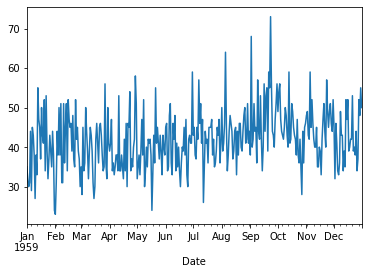

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64

In [ ]:
series1 = read_csv('daily-total-female-births.csv', header=0,parse_dates=[0], index_col=0, squeeze=True)
series1.plot()
plt.show()
series1.head()

<H2>Look into the statistical summary.
what do you think? is it Stationary?

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64

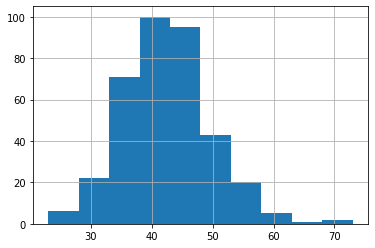

In [ ]:
series1.hist()
series1.describe()

<H2> See for ACF and PACF for the given series

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


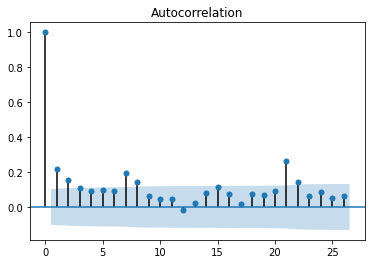

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series1)
plt.show()

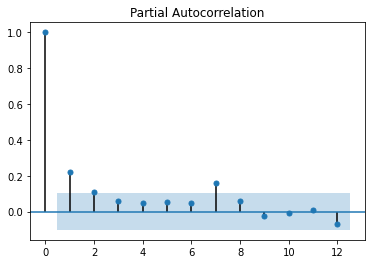

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series1, lags=12)
plt.show()

<H2> There is another approach in which you partitioned the data into two segments and look for the statistical properties if these are similar or not?

In [ ]:
X=series1.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


<H2> Perform ADFuller test for the given dataset
H0: Time series in non-stationary
H1: Reject the H0 -> it is stationary

<H2>How to Check for it?
If the ADF Statistic less than Critical Values for x%

<H2>If the ADF Statistics < X% reject H0

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
if result[1]>0.05:
  print('Series is not Stationary')
else:
  print("Series is stationary")

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571
Series is stationary


#Airline Passendge

<H2> Pick Another dataset, This time a non-stationary (Airline Passengers.csv)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving airline-passengers.csv to airline-passengers.csv


<H2> Look at the plots of the dataset to visually inspect the stationarity .. Obviously Not

<ipython-input-4-c357d44b3fda>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series2 = pd.read_csv('airline-passengers.csv', header=0,parse_dates=[0], index_col=0, squeeze=True)


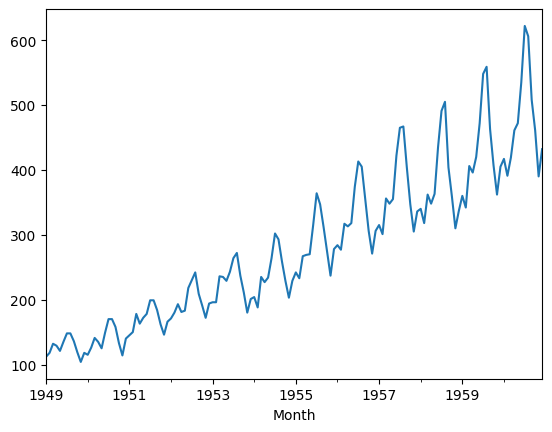

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [ ]:
series2 = pd.read_csv('airline-passengers.csv', header=0,parse_dates=[0], index_col=0, squeeze=True)
series2.plot()
plt.show()
series2.head()

<H2> Look into the statistical summary. what do you think?

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Passengers, dtype: float64

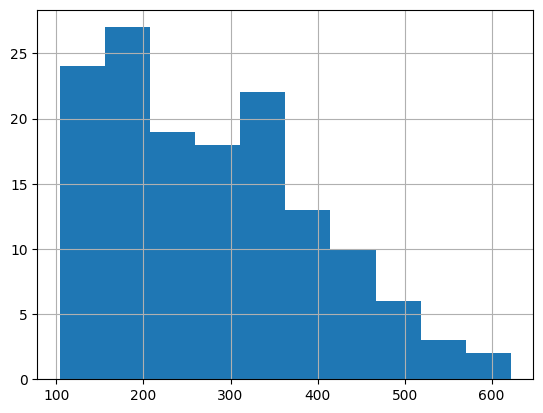

In [ ]:
series2.hist()
series2.describe()

<H2> See ACF and PACF for the given series

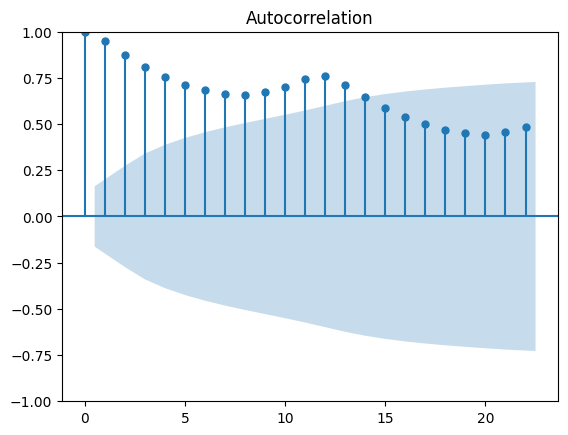

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series2)
plt.show()

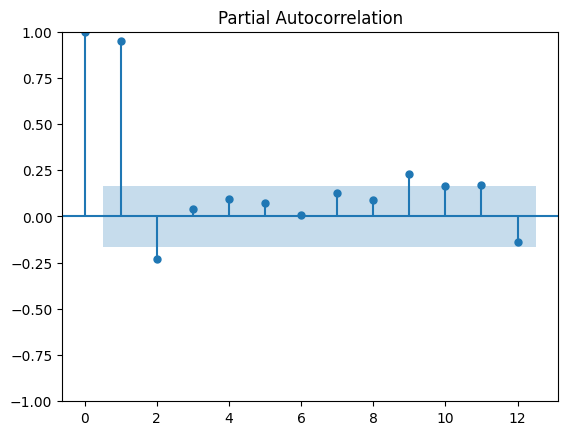

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series2, lags=12)
plt.show()

<H2> Partitioned the data into two segments and look for the statistical properties if these are similar or not?

In [ ]:
X=series2.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


<H2> Perform ADFuller test for the given dataset H0: Time series in non-stationary H1: Reject the H0 -> it is stationary

<H2> If the ADF Statistics < X% reject H0 otherwise accept H0

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))
if result[0]>0.05:
  print('Series is not Stationary')
else:
  print("Series is stationary")

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Series is not Stationary


<H2> Here in this lab, we see how to check for stationairty and non-stationarity time series. This is imporatnt for all type of analysis in Time Series

<H2> There are three different kinds of stationarity data in time series.

<H3>
1. Strict Stationary
2. Trend Stationary
3. Difference Stationary

<H1> KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

<H2> KPSS is another test for checking the stationarity of a time series (slightly less popular than the Dickey Fuller test). The null and alternate hypothesis for the KPSS test are opposite that of the ADF test, which often creates confusion. KPSS is good for checking whether a time series is trend stationarity or not.

<H3> Lets check KPSS for the second time series - Airline Passengers. ADF return it as Non-Stationarity

In [ ]:
from statsmodels.tsa.stattools import kpss


In [ ]:
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [ ]:
kpss_test(X)

KPSS Statistic: 1.6513122354165206
p-value: 0.01
num lags: 8
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


<ipython-input-13-af35e1e32e82>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series)


In [ ]:
Xd = np.diff(X)


In [ ]:
kpss_test(Xd)

KPSS Statistic: 0.023897614400183967
p-value: 0.1
num lags: 7
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


<ipython-input-13-af35e1e32e82>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series)


<H2> In order to check a time series for truly stationary. You can use both tests.
There are four possibilities:
<H4>
Case 1: Both tests conclude that the series is not stationary -> series is not stationary
<H4>
Case 2: Both tests conclude that the series is stationary -> series is stationary
<H4>
Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary
<H4>
Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary
